## TensorFlow - Regression
We will show the power of ANNs to fit learn non linear function

In [35]:
#import stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [67]:
#lets make a synthetic dataset
X = np.linspace(0,2*np.pi,100000)
y = np.sin(x) + np.cos(3*x)

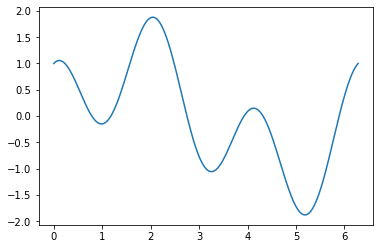

In [68]:
plt.plot(x,y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
len(X_train)

80000

In [40]:
len(X_test)

20000

In [78]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2048, input_shape=(1,), activation='relu' ),
  tf.keras.layers.Dense(1)  
])

In [79]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4150 - val_loss: 0.2658
Epoch 2/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1313 - val_loss: 0.0354
Epoch 3/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0140
Epoch 4/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.0087 - val_loss: 0.0062
Epoch 5/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0060 - val_loss: 0.0015
Epoch 6/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0055 - val_loss: 0.0040
Epoch 7/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0060 - val_loss: 0.0096
Epoch 8/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 9/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.0046 - val_loss: 0.0077
Epoch 10/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.005

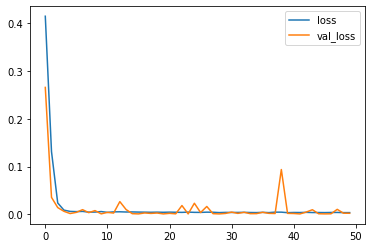

In [80]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [81]:
#Make the prediction
sortNdx = np.argsort(X_test)
X_test = X_test[sortNdx]
y_test = y_test[sortNdx]
y_predict = model.predict(X_test)

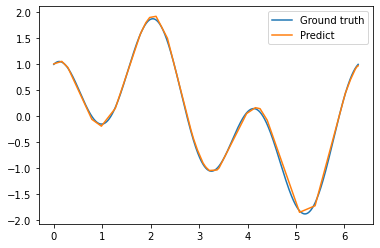

In [83]:
plt.plot(X_test, y_test, label='Ground truth')
plt.plot(X_test, y_predict, label='Predict')
plt.legend()

We see a very good fit of the data using ANN.